<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_saudi.csv to dataset_saudi (1).csv
Saving dataset_2018.csv to dataset_2018 (1).csv


In [ ]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [ ]:
mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score'],axis=1)
mixed_df.columns
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [ ]:
mixed_df['ASD_Traits'].value_counts()

Yes    728
No     326
Name: ASD_Traits, dtype: int64

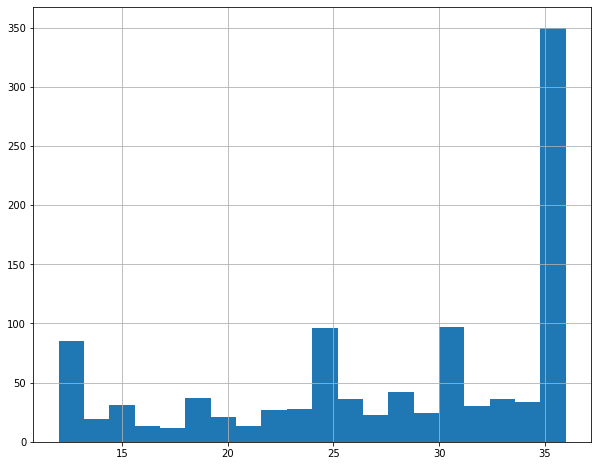

In [ ]:
mixed_df['Age_Mons'].hist(bins=20, figsize=(10,8))

In [ ]:
mixed_df.shape 

(1054, 17)

In [ ]:
females = mixed_df[mixed_df['Sex']=='f']
females.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      319 non-null    int64 
 1   A2                      319 non-null    int64 
 2   A3                      319 non-null    int64 
 3   A4                      319 non-null    int64 
 4   A5                      319 non-null    int64 
 5   A6                      319 non-null    int64 
 6   A7                      319 non-null    int64 
 7   A8                      319 non-null    int64 
 8   A9                      319 non-null    int64 
 9   A10                     319 non-null    int64 
 10  Age_Mons                319 non-null    int64 
 11  Sex                     319 non-null    object
 12  Ethnicity               319 non-null    object
 13  Jaundice                319 non-null    object
 14  Family_mem_with_ASD     319 non-null    object
 15  Who c

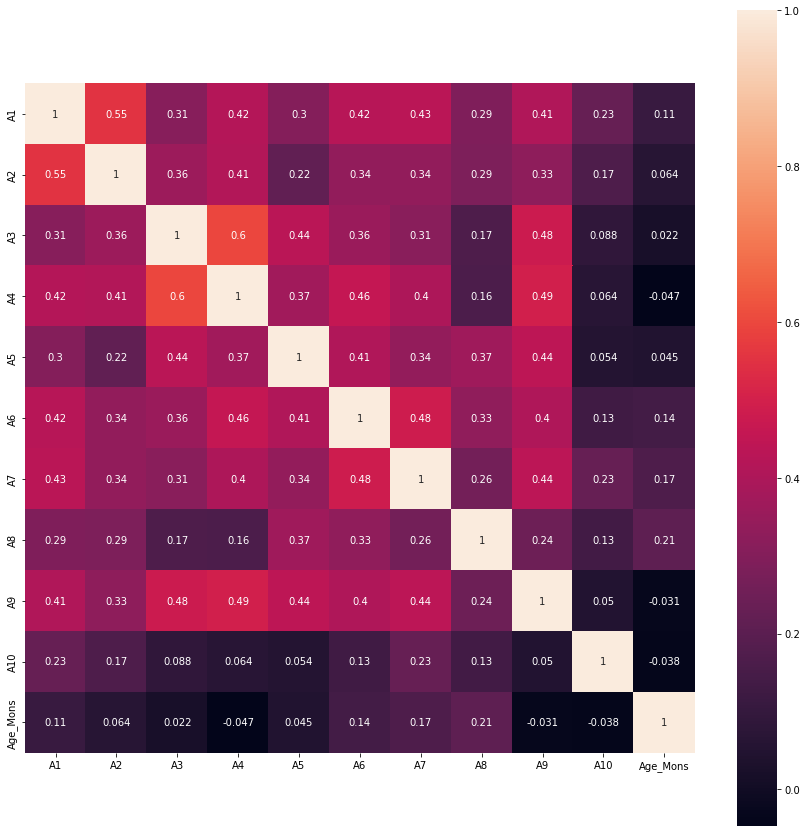

In [ ]:
f_corr = females.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=f_corr, annot=True, square=True, cbar=True)

In [ ]:
features=list(mixed_df)
print(features)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'ASD_Traits']


In [ ]:
from pandas.plotting import scatter_matrix

corr_matrix = mixed_df.corr()
# abs_corr_matrix = abs(corr_matrix['ASD_Traits'])
# abs_corr_matrix.sort_values(ascending=False)
# corr_matrix['ASD_Traits'].sort_values(ascending=False)

In [ ]:
from sklearn.base import BaseEstimator

class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex', 'Jaundice', 'Family_mem_with_ASD','Who completed the test', 'Ethnicity']
target = ['ASD_Traits']

mixed_df['Age_Mons'] = scaler.fit_transform(mixed_df['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    mixed_df[c] = encoder.fit_transform(mixed_df[c].values.reshape(-1,1)).toarray()
mixed_df.dtypes
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,1,1,1,1,1,1,1,-0.484817,0.0,1.0,1.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,-0.986286,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_mixed, y_mixed = train_test_split(mixed_df, test_size=0.3, random_state=42)

mixed_training = X_mixed.drop("ASD_Traits", axis=1)
mixed_class = X_mixed["ASD_Traits"] 

In [ ]:
# scale_pipeline = Pipeline([
#     ('selector', DataFrameSelector(age)),
#     ('scaler', scaler)
# ])

In [ ]:
# encode_pipeine = Pipeline([
#     ('selector',DataFrameSelector(char_vals)),
#     ('encoder', encoder)
# ])

In [ ]:
# from sklearn.pipeline import FeatureUnion

# full_pipeline = FeatureUnion(transformer_list = [
#     ('scale_pipeline',scale_pipeline),
#     ('encode_pipeline',encode_pipeine)
# ])

In [ ]:
# mixed_df_prepared = full_pipeline.fit_transform(mixed_training)

In [ ]:
# encode_target = Pipeline([
#     ('selector', DataFrameSelector(target)),
#     ('encoder',encoder)
# ])

In [ ]:
# target_prepared = encoder.fit_transform(mixed_class.values.reshape(-1,1))

In [ ]:
#Turns np array into shape (737,1) which is a column vector, not 1D array. 
# target_prepared = np.argmax(target_prepared, axis=1)

In [ ]:
#Converts colum vector to 1D array
# target_prepared = np.ravel(target_prepared)

In [ ]:
# target_prepared.shape

In [ ]:
# print(target_prepared)

In [ ]:
# attributes = ['Age_Mons','ASD_Traits']
# scatter_matrix(mixed_df[attributes], figsize=(25,15))

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(mixed_training, mixed_class)


LogisticRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def display_results(model, predictors, targets):
  predictions = model.predict(predictors)
  mse = mean_squared_error(targets, predictions)
  rmse = np.sqrt(mse)

  print("Root mean squared eror: ", rmse)
  print("MSE: ", mse)
  print("R2 Score: ", r2_score(targets, predictions))

In [ ]:
display_results(log_reg, mixed_training, mixed_class)

Root mean squared eror:  0.0
MSE:  0.0
R2 Score:  1.0


In [ ]:
mixed_test = y_mixed.drop("ASD_Traits", axis=1)
test_class = y_mixed["ASD_Traits"]

In [ ]:
from sklearn.metrics import accuracy_score

test_pred = log_reg.predict(mixed_test)

accuracy_score(test_class, test_pred)

1.0

**Feature importance ( Coefficients )**

In [ ]:
coef = np.abs(log_reg.coef_)
sorted(zip(coef[0], np.array(features)), reverse=True)

[(2.7245885850553604, 'A9'),
 (2.65260045507795, 'A2'),
 (2.514351371542612, 'A8'),
 (2.423752735567937, 'A4'),
 (2.403881821494827, 'A5'),
 (2.2982497286027628, 'A7'),
 (2.2901220221802037, 'A6'),
 (2.1840290966852485, 'A1'),
 (2.1147146058941053, 'A10'),
 (1.860994972392139, 'A3'),
 (0.614236256699905, 'Jaundice'),
 (0.30137437965834735, 'Sex'),
 (0.15134210971533818, 'Ethnicity'),
 (0.11598289693087713, 'Family_mem_with_ASD'),
 (0.1000275877075814, 'Who completed the test'),
 (0.027433853774985525, 'Age_Mons')]

In [ ]:
sorted(zip(log_reg.coef_[0], np.array(features)), reverse=True)

[(0.614236256699905, 'Jaundice'),
 (0.30137437965834735, 'Sex'),
 (0.15134210971533818, 'Ethnicity'),
 (-0.027433853774985525, 'Age_Mons'),
 (-0.1000275877075814, 'Who completed the test'),
 (-0.11598289693087713, 'Family_mem_with_ASD'),
 (-1.860994972392139, 'A3'),
 (-2.1147146058941053, 'A10'),
 (-2.1840290966852485, 'A1'),
 (-2.2901220221802037, 'A6'),
 (-2.2982497286027628, 'A7'),
 (-2.403881821494827, 'A5'),
 (-2.423752735567937, 'A4'),
 (-2.514351371542612, 'A8'),
 (-2.65260045507795, 'A2'),
 (-2.7245885850553604, 'A9')]

**Log Odds Ratios**

In [ ]:
odds_ratios = np.exp(log_reg.coef_)
# print(odds_ratios)
sorted(zip(odds_ratios[0], np.array(features)), reverse=True)

[(1.8482444760415169, 'Jaundice'),
 (1.351715301534312, 'Sex'),
 (1.163394598603234, 'Ethnicity'),
 (0.9729390366694846, 'Age_Mons'),
 (0.9048124559901864, 'Who completed the test'),
 (0.8904904532870083, 'Family_mem_with_ASD'),
 (0.15551781742864146, 'A3'),
 (0.12066772249621724, 'A10'),
 (0.11258699168964191, 'A1'),
 (0.10125410585329488, 'A6'),
 (0.10043447756790244, 'A7'),
 (0.09036648499829322, 'A5'),
 (0.08858854350292021, 'A4'),
 (0.08091537920666336, 'A8'),
 (0.07046772643243032, 'A2'),
 (0.06557317495339682, 'A9')]

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(log_reg, n_features_to_select=1)
selector = selector.fit(mixed_training, mixed_class)

In [ ]:
order = selector.ranking_
order

array([ 6,  3, 10,  4,  2,  8,  7,  5,  1,  9, 16, 12, 13, 11, 14, 15])

In [ ]:
# mixed_training.columns

In [ ]:
feature_ranks = []

for i in order:
  feature_ranks.append(f"{i}. {features[i-1]}")
feature_ranks

['6. A6',
 '3. A3',
 '10. A10',
 '4. A4',
 '2. A2',
 '8. A8',
 '7. A7',
 '5. A5',
 '1. A1',
 '9. A9',
 '16. Who completed the test',
 '12. Sex',
 '13. Ethnicity',
 '11. Age_Mons',
 '14. Jaundice',
 '15. Family_mem_with_ASD']

In [ ]:
selector.score(mixed_training, mixed_class)

0.7598371777476255

In [ ]:
from sklearn.model_selection import cross_validate

metrics =['r2','neg_mean_squared_error']

cross_val_scores = cross_validate(log_reg,mixed_training,mixed_class,
                                  scoring=metrics, return_train_score=True,cv=10)

# print("Test R2 scores: ", cross_val_scores['test_r2'])
print("Mean Test R2: ", cross_val_scores['test_r2'].mean())

rmse_test = np.sqrt(-cross_val_scores['test_neg_mean_squared_error']).mean()


# print("Test MSE scores: ", -cross_val_scores['test_neg_mean_squared_error'])
print("Mean Test MSE: ", -cross_val_scores['test_neg_mean_squared_error'].mean())

print("Test std: ",np.sqrt(-cross_val_scores['test_neg_mean_squared_error']).std() )

print("RMSE Test: ", rmse_test)


Mean Test R2:  0.9936913895993179
Mean Test MSE:  0.0013513513513513514
Test std:  0.03487429162314579
RMSE Test:  0.011624763874381928


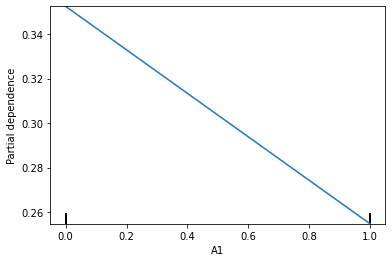

In [ ]:
# from sklearn.inspection import plot_partial_dependence

# plot_partial_dependence(log_reg, mixed_training, [0], feature_names=['Sex'])

from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(log_reg, mixed_training,[0])

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




In [ ]:
# import pickle

# pickle.dump(log_reg, open('log_reg.pkl','wb'))